# Modelos estadisticos 

Presentado por: 
* John Gonzalez 
* Julio Sanabria

## Metadata

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## Cargargando las bibliotecas

In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression, RidgeClassifier, Lasso, Ridge
from sklearn.ensemble        import RandomForestClassifier 
from sklearn.tree            import DecisionTreeClassifier
from sklearn.svm             import SVC
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import classification_report
from sklearn.metrics         import plot_confusion_matrix
from sklearn.metrics         import plot_roc_curve
from sklearn.metrics         import plot_precision_recall_curve
from sklearn.metrics         import accuracy_score, make_scorer


from pathlib import Path
current_dir = Path(".").resolve()
project_dir = current_dir.parent

print(current_dir)
print(project_dir)

/home/jupyter/ESEIT_BigData/data/raw
/home/jupyter/ESEIT_BigData/data


## Lectura del archivo

In [2]:
file_data = os.path.join(project_dir, "raw", "UCI_Credit_Card.csv")
df      = pd.read_csv(file_data)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Explorando los datos

In [3]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Se detectan datos en la DataFrame original que no estan etiquetados según la metadata. Se procede con la limpieza

In [4]:
df.shape

(30000, 25)

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

<AxesSubplot:>

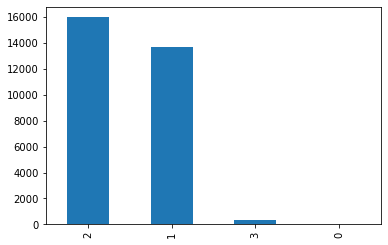

In [7]:
# Validación de la variable Marriage
df.MARRIAGE.value_counts().plot(kind = 'bar')   

# Se detectan datos en 0 que no estan especificados en la metadata

<AxesSubplot:>

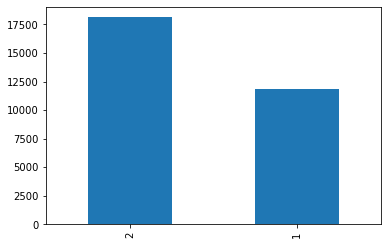

In [8]:
# Validación de la variable SEX
df.SEX.value_counts().plot(kind = 'bar')

<AxesSubplot:>

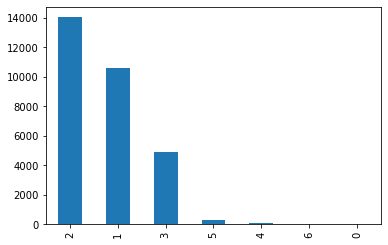

In [15]:
# Validación de la variable EDUCATION
df.EDUCATION.value_counts().plot(kind = 'bar')

# Se detectan dos variables con el mismo significado y una en 0 que no esta especificado en la metadata

Text(0.5, 1.0, 'Cantidad de creditos por edad')

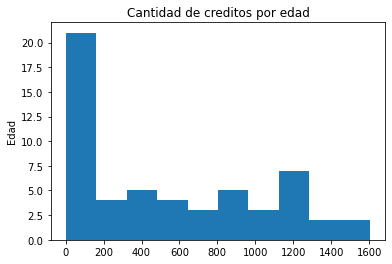

In [16]:
# Indentificamos el comportamiento de los creditos por edad

df.AGE.value_counts().plot(kind="hist")
plt.ylabel("Edad")
plt.title("Cantidad de creditos por edad")

Text(0.5, 1.0, 'Monto otorgado representado en dolares')

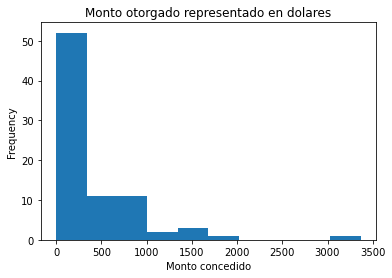

In [17]:
# Analizando el monto otorgado em dolares 

df.LIMIT_BAL.value_counts().plot(kind="hist")
plt.xlabel("Monto concedido")
plt.title("Monto otorgado representado en dolares")

In [19]:
# Cambio de nombre de la variable default.payment.next.month a "payment"
df=df.rename(columns={'default.payment.next.month':'DEFAULT_PAYMENT',
                      "PAY_0":"PAY_1"})
df["DEFAULT_PAYMENT"].value_counts()

0    23364
1     6636
Name: DEFAULT_PAYMENT, dtype: int64

<AxesSubplot:>

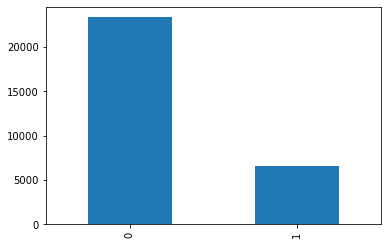

In [20]:
# Identifdicando la variable objetivo

df.DEFAULT_PAYMENT.value_counts().plot(kind = 'bar')

## Limpieza de datos

In [21]:
# Eliminamos la variable "ID" que no nos sirve para el ejercicio central
df.drop(['ID'], axis=1, inplace=True)

In [23]:
# Eliminamos los valores 0, 5 y 6 y lo unificamos al dato 4 (otros) de la variable EDUCATION

def edu(x):
    if (x==0) or (x==5) or (x==6):
        x=4
    return x
df['EDUCATION']=df['EDUCATION'].apply(edu)

In [24]:
# Eliminamos los valores en 0 y lo unificamos al dato 3 (otros) de la variable MARRIAGE

def mar(x):
    if (x==0):
        x=3
    return x
df['MARRIAGE']=df['MARRIAGE'].apply(mar)

In [25]:
# Eliminamos los valores -1y -2 y lo unificamos a 0 de las variables PAY_n

def fillpay(x):
    if (x==-1) or (x==-2):
        x=0
    return x
df['PAY_1']=df['PAY_1'].apply(fillpay)
df['PAY_2']=df['PAY_2'].apply(fillpay)
df['PAY_3']=df['PAY_3'].apply(fillpay)
df['PAY_4']=df['PAY_4'].apply(fillpay)
df['PAY_5']=df['PAY_5'].apply(fillpay)
df['PAY_6']=df['PAY_6'].apply(fillpay)

In [26]:
# Creamos la variable target
var_target = df["DEFAULT_PAYMENT"]
# Creamos una nueva dataframe con las variables a trabajar
cols = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df1 = df[cols]
df1.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

### Buscando correlaciones

#### Correlación con datos originales

<AxesSubplot:>

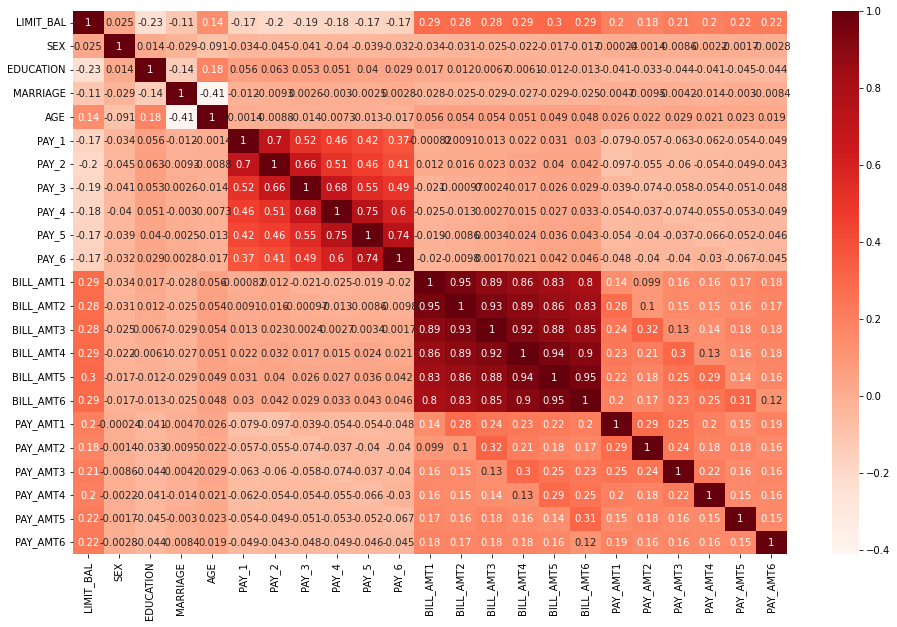

In [28]:
plt.figure (figsize= (16,10))

correlacion = df1.corr()

sns.heatmap(correlacion, cmap="Reds", annot=True)

<AxesSubplot:>

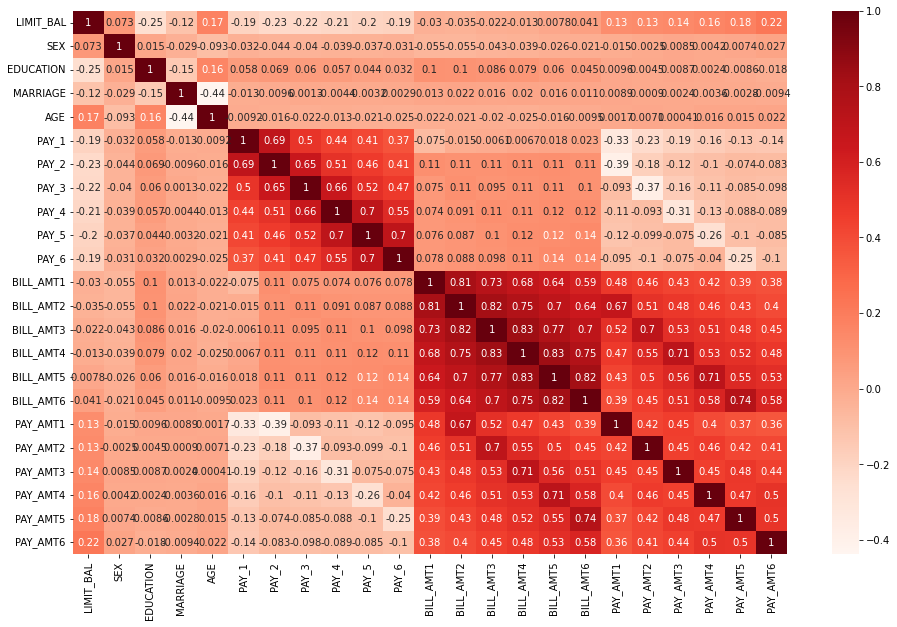

In [29]:
# Correlaci[on de los datos aplicando logaritmo

plt.figure (figsize= (16,10))

correlacion_log = np.log(df1+2).corr()

sns.heatmap(correlacion_log, cmap="Reds", annot=True)

### Aplicando la division de los datos de entrenamiento y de prueba

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df1, var_target, test_size=0.30, random_state=42)

In [31]:
print(df1.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30000, 23)
(21000, 23)
(9000, 23)
(21000,)
(9000,)


## Entrenamiento de los modelos

### Usando modelo Ridge

Precisión del modelo Ridge : 81.44444444444444
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.68      0.28      0.40      1960

    accuracy                           0.81      9000
   macro avg       0.75      0.62      0.64      9000
weighted avg       0.80      0.81      0.78      9000



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


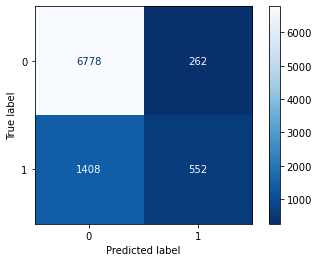

In [26]:
ridge = RidgeClassifier()

ridge.fit(X_train, y_train)

ridge_pre = ridge.score(X_test, y_test)*100

print('Precisión del modelo Ridge :', ridge_pre)

print( classification_report(y_test, ridge.predict(X_test)) )

plot_confusion_matrix(ridge, X_test, y_test, cmap="Blues_r")

### Arbol de decisión 

In [ ]:
arbol = DecisionTreeClassifier(criterion='entropy', max_depth=10)

arbol.fit(X_train, y_train)

arbol_prec = arbol.score(X_test, y_test)*100

print('Precisión del arbol de decisión :', arbol_prec)

print( classification_report(y_test, arbol.predict(X_test)) )

plot_confusion_matrix(arbol, X_test, y_test, cmap="Blues_r")

### Modelo random forest

Model3 Accuracy score is : 81.93333333333334
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


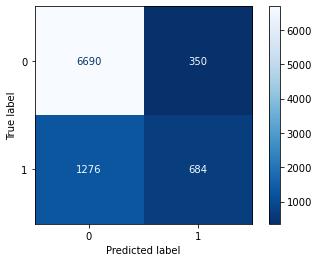

In [47]:
forest = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)

forest.fit(X_train, y_train)

forest_prec = forest.score(X_test, y_test)*100

print('Model3 Accuracy score is :', forest_prec)

print( classification_report(y_test, forest.predict(X_test)) )

plot_confusion_matrix(forest, X_test, y_test, cmap="Blues_r")

### Modelo regresión logistica

In [ ]:
logist = LogisticRegression()

logist.fit(X_train, y_train)

logist_prec = logist.score(X_test, y_test)*100

print('Precisión de regresión logistica :', logist_prec)

print( classification_report(y_test, logist.predict(X_test)) )

plot_confusion_matrix(logist, X_test, y_test, cmap="Blues_r")

### Modelo SVC

In [ ]:
svc = SVC()

svc.fit(X_train, y_train)

svc_prec = svc.score(X_test, y_test)*100

print('Precisión de SVC :', svc_prec)

print( classification_report(y_test, svc.predict(X_test)) )

plot_confusion_matrix(svc, X_test, y_test, cmap="Blues_r")

## Visualizando el mejor modelo

In [28]:
modelos = ['RidgeClassifier', 'DecisionTree', 'RandomForestClassifier', 'LogisticRegression', "SVC"]

precision = [ridge_pre, arbol_prec, forest_prec, logist_prec, svc_prec]

plt.figure(figsize=(15,5))
plt.barh(modelos, precision)
  
for index, value in enumerate(precision):
    plt.text(value, index, str("%.2f"%value))
plt.title("Precición de los modelos");

NameError: name 'arbol_prec' is not defined

Detecamos que los modelos con mayor precision fueron Ridege y Random Forest

### Escalado de datos

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(X_train)

x_train_scaled = sc.transform(X_train)
x_test_scaled  = sc.transform(X_test)

print("x_train shape", x_train_scaled.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test_scaled.shape)
print("y_test shape", y_test.shape)

x_train shape (21000, 23)
y_train shape (21000,)
x_test shape (9000, 23)
y_test shape (9000,)


### PCA

In [30]:
from sklearn.decomposition import PCA

pca = PCA(0.90).fit(x_train_scaled)

x_train_pca = pca.transform(x_train_scaled)
x_test_pca  = pca.transform(x_test_scaled)

In [31]:
pca.explained_variance_ratio_

array([0.2567363 , 0.17092949, 0.07396592, 0.06599355, 0.04684752,
       0.04398571, 0.04160089, 0.03908886, 0.03831627, 0.03724727,
       0.03356218, 0.0296177 , 0.02602046])

In [32]:
rows = X_train.columns

columns = []
for i in range(13):
    columns.append("PC_{}".format(i+1))
    
feature_importance = pd.DataFrame(
    pca.components_.T, 
    index  =rows, 
    columns=columns
)

### Entrenando el modelo Ridge con PCA

In [33]:
ridge_pca = RidgeClassifier()

ridge_pca.fit(x_train_pca, y_train)

ridge_prec_pca = ridge_pca.score(x_test_pca, y_test)*100

print('Model3 Accuracy score is :', ridge_prec_pca)

#print( classification_report(y_test, forest.predict(x_train_pca)) )

Model3 Accuracy score is : 80.38888888888889


In [39]:
y_pred = ridge_pca.predict(x_test_pca)

from sklearn.metrics import classification_report

print(
    classification_report(y_test, y_pred)
)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7040
           1       0.62      0.25      0.36      1960

    accuracy                           0.80      9000
   macro avg       0.72      0.60      0.62      9000
weighted avg       0.78      0.80      0.77      9000



## Validando la efectividad del modelo elegido

### Curvas de validación

In [52]:
from sklearn.model_selection import learning_curve

train_sizes, train_score, test_score = learning_curve(
    estimator = forest, 
    X = X_train,
    y = y_train,
    train_sizes = np.linspace(0.1, 1.0, 10),
    cv = 10,
    n_jobs=-1
)

In [53]:
train_mean = np.mean(train_score, axis = 1)
train_std  = np.std(train_score, axis = 1)

test_mean  = np.mean(test_score, axis = 1)
test_std   = np.std(test_score, axis =1)

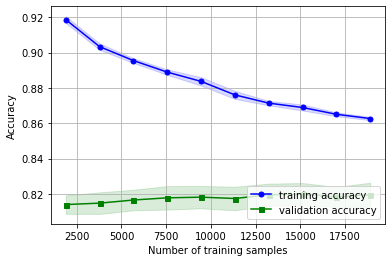

In [54]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#### Tasa de positivos

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


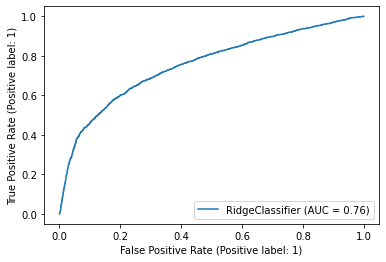

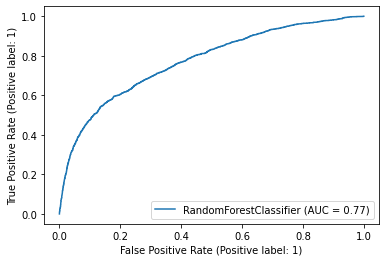

In [57]:
plot_roc_curve(ridge, X_test, y_test)
plot_roc_curve(forest, X_test, y_test)

#### Precisión del Recall

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


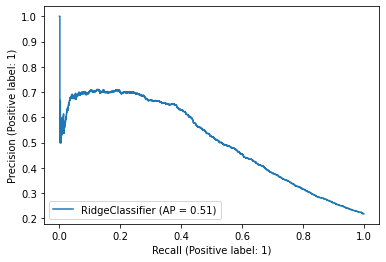

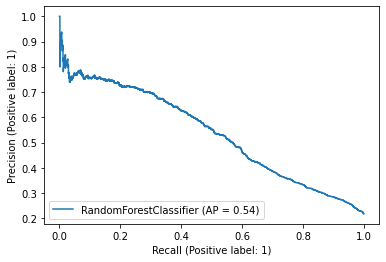

In [58]:
plot_precision_recall_curve(ridge, X_test, y_test);
plot_precision_recall_curve(forest, X_test, y_test);

### Conslusiones 

Ningun modelo es suficientemente efectivo para predecir la variable target. Se uso diferentes modelos y se jugaron con diferentes parametros según aplicara pero el resultado no mejoro. 

Para finalizar usamos los dos modelos con mejores resultados y realizamos algunas validaciones. Concluimos que el modelo mas confiable y preciso fue **Random Forest**.